## **Task 1: Relationships between the different features.**

### **1.	Import the relevant libraries.**

In [ ]:
import pandas as pd
import seaborn as sns

### **2.	Load the MLR_data.csv in your notebooks.**

In [ ]:
df = pd.read_csv('/content/MLR_data.csv')

### **3.	Perform EDA on the dataset by using head, shape and describe functions.**

In [ ]:
print(df.describe())

              Year      Month  Interest_Rate  Unemployment_Rate  \
count    24.000000  24.000000      24.000000           24.00000   
mean   2016.500000   6.500000       2.072917            5.77500   
std       0.510754   3.526299       0.349527            0.33002   
min    2016.000000   1.000000       1.750000            5.30000   
25%    2016.000000   3.750000       1.750000            5.50000   
50%    2016.500000   6.500000       2.000000            5.85000   
75%    2017.000000   9.250000       2.500000            6.10000   
max    2017.000000  12.000000       2.750000            6.20000   

       Stock_Index_Price  
count          24.000000  
mean         1070.083333  
std           210.735341  
min           704.000000  
25%           928.250000  
50%          1061.000000  
75%          1239.000000  
max          1464.000000  


In [ ]:
print(df.head(5))

   Year  Month  Interest_Rate  Unemployment_Rate  Stock_Index_Price
0  2017     12           2.75                5.3               1464
1  2017     11           2.50                5.3               1394
2  2017     10           2.50                5.3               1357
3  2017      9           2.50                5.3               1293
4  2017      8           2.50                5.4               1256


In [ ]:
print(df.corr().round(2))

                   Year  Month  Interest_Rate  Unemployment_Rate  \
Year               1.00   0.00           0.88              -0.88   
Month              0.00   1.00           0.34              -0.35   
Interest_Rate      0.88   0.34           1.00              -0.93   
Unemployment_Rate -0.88  -0.35          -0.93               1.00   
Stock_Index_Price  0.86   0.48           0.94              -0.92   

                   Stock_Index_Price  
Year                            0.86  
Month                           0.48  
Interest_Rate                   0.94  
Unemployment_Rate              -0.92  
Stock_Index_Price               1.00  


### **4.	Identify the independent variables (IV) and dependent variable (DV) and plot the scatter plot of IV vs DV. Write your inference for each plot. <br> 5.	Plot the scatter plots for IV vs IV. Write your inference for each plot.**

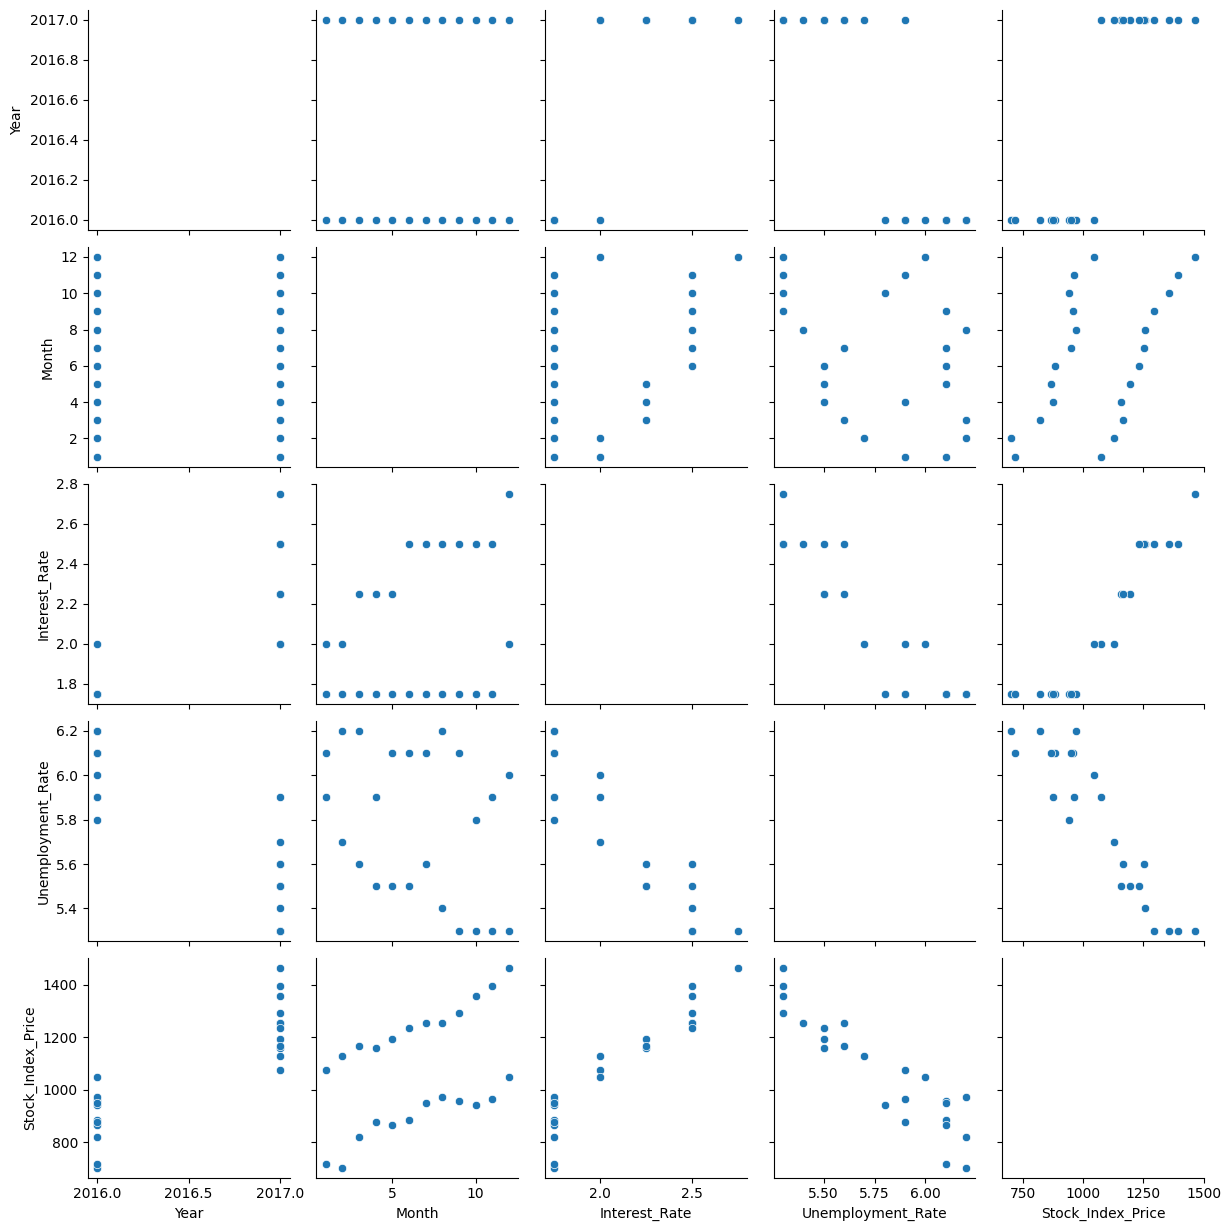

In [ ]:
sns.pairplot(df, diag_kind='none')

## **Task 2: Fitting different simple linear regression models for each IV/DV pair.**

### **1.	Import LinearRegression from SKlearn.**

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

### **2.	Create model for linear regression.**

In [ ]:
reg_1 = LinearRegression()

reg_2 = LinearRegression()

### **3.	Conduct simple linear regression for each IV/DV pair. <br> a.	Interest rate vs stock index price <br> b.	Unemployment vs stock index price**

In [ ]:
iv_1 = df[['Interest_Rate']]
iv_2 = df[['Unemployment_Rate']]
dv = df[['Stock_Index_Price']]

In [ ]:
reg_1.fit(iv_1, dv)

LinearRegression()

In [ ]:
reg_2.fit(iv_2, dv)

LinearRegression()

### **4.	Determine and tabulate the values of R2, slope and intercept for each model.**

In [ ]:
print('Intercept: ', reg_1.intercept_)
print('Slope: ', reg_1.coef_)
print('R_sqr:', reg_1.score(iv_1, dv))

Intercept:  [-99.46431881]
Slope:  [[564.20389249]]
R_sqr: 0.8757089547891359


In [ ]:
print('Intercept: ', reg_2.intercept_)
print('Slope: ', reg_2.coef_)
print('R_sqr:', reg_2.score(iv_2, dv))

Intercept:  [4471.33932136]
Slope:  [[-588.96207585]]
R_sqr: 0.850706607677214


### **5.	Determine the predicted value of stock index price for interest rate of 2.75.**

In [ ]:
reg_1.predict([[2.75]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1452.09638554]])

### **6.	Determine the predicted value of stock index price for unemployment rate of 6.**

In [ ]:
reg_2.predict([[6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[937.56686627]])

### **7.	Compare both the models based on R2 and the mean square error between predicted and actual stock index price.**

In [ ]:
print('R_sqr:', reg_1.score(iv_1, dv))

dv_1 = reg_1.predict(iv_1)

print('MSE: ', mean_squared_error(dv, dv_1))

R_sqr: 0.8757089547891359
MSE:  5289.701729996909


In [ ]:
print('R_sqr:', reg_2.score(iv_2, dv))

dv_2 = reg_2.predict(iv_2)

print('MSE: ', mean_squared_error(dv, dv_2))

R_sqr: 0.850706607677214
MSE:  6353.776447105782


## **Task 3: Multiple regression model**

### **1.	Use both interest rate and unemployment rate and create a multiple regression model.**

In [ ]:
multi_iv = df[['Interest_Rate', 'Unemployment_Rate']]
multi_dv = df[['Stock_Index_Price']]

print(multi_iv.shape)
print(multi_dv.shape)

(24, 2)
(24, 1)


In [ ]:
from sklearn.model_selection import train_test_split

multi_iv_train, multi_iv_test, multi_dv_train, multi_dv_test = train_test_split(multi_iv, multi_dv, test_size=0.2, random_state=0)

In [ ]:
multi_reg = LinearRegression().fit(multi_iv_train, multi_dv_train)

### **2.	Determine the value of R2, slope and intercept for the model.**

In [ ]:
print('Intercept (beta_0): ', multi_reg.intercept_)
print('Slope for Interest Rate (beta_1): ', multi_reg.coef_[0])
print('Slope for Unemloyment Rate (beta_2): ', multi_reg.coef_[1])
print('R_sqr for training dataset:', multi_reg.score(multi_iv_train, multi_dv_train))
print('R_sqr for testing dataset:', multi_reg.score(multi_iv_test, multi_dv_test))

Intercept (beta_0):  1431.790300853165
Slope for Interest Rate (beta_1):  370.5420488806209
Slope for Unemloyment Rate (beta_2):  -194.83930976970925
R_sqr for training dataset: 0.9146528617598106
R_sqr for testing dataset: 0.6613091768846904


### **3.	Determine the predicted value of stock index price for <br> a.	interest rate =2.75 and unemployment rate = 5.3 <br> b.	interest rate =2 and unemployment rate = 6**

In [ ]:
multi_reg.predict([[2.75, 5.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1418.1325935])

In [ ]:
multi_reg.predict([[2, 6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1003.83854])

### **4.	Compare the model with both the models from task 2.**

In [ ]:
print('Simple Linear Regression with Interest Rate R_sqr:', reg_1.score(iv_1, dv))
print('Simple Linear Regression with Unemployment Rate R_sqr:', reg_2.score(iv_2, dv))

Simple Linear Regression with Interest Rate R_sqr: 0.8757089547891359
Simple Linear Regression with Unemployment Rate R_sqr: 0.850706607677214


In [ ]:
print('Multiple Linear Regression with Interest Rate and Unemployment Rate R_sqr:', multi_reg.score(multi_iv_train, multi_dv_train))

Multiple Linear Regression with Interest Rate and Unemployment Rate R_sqr: 0.9146528617598106


### **5.	Identify and state the best model for the dataset.**

R_squared value of multiple regression is more than individual regression for interest rate and unemployment rate. However, it is noted that for the multiple regression, there is a difference between the R_square between the train and test datasets is huge which can be due to overfitting of the training dataset.